#Self Organizing Map

##Install MiniSom Package

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [4]:
!pip install minisom

In [5]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) # X and y here are the dimensions of the grid used in the SOM X*y
som.random_weights_init(X) #Initializng the som with random weights 
som.train_random(data = X, num_iteration = 100) # Training the X dataset with 100 iterations or it can be thought of as epochs

##Visualizing the results


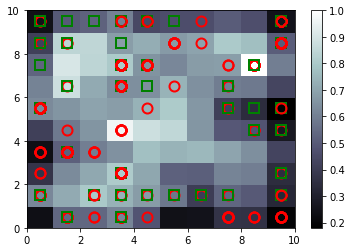

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone() # This initializes the window or the convex at which the self organizing map will be polted on

pcolor(som.distance_map().T) # This will make the colors corresponds to the mean distances of the winning nodes to detect outliers on the colored data and detect the frauds 
# Here we are making the trasnpose to get the right order of the mean sqaure distance of each winning node

colorbar() # To create the legend

markers = ['o', 's']
colors = ['red', 'green']

for i, x in enumerate(X): # Here we want to access all the customers (i) and the whole vector of each customer (X)
  w = som.winner(x) # We get the winning node for each costumer for each customer to detect the outliers and mark them with being approved or not
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2) # Putting the marker on the center of the winning node which is coordinated on w[0] the X coordinate and w[1] the y coordinate
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X) # This function will return a dict containing all the winning nodes mappings
frauds = mappings[(8,7)]
fruads = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [11]:
print("IDs of possible fraunch clients")
for i in fruads[:, 0]:
  print(int(i))

IDs of possible fraunch clients
15704581
15725776
15697460
15737998
15586183
15718921
15607988
15683993
15797767
15744044
15632010
15804235
15627365
15700300
15791944
15576680
15620570
15592412
